In [1]:
# Ejercicio con expresiones regulares
# consultas en la pagina https://platzi.com/blog/expresiones-regulares-python/

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12.0, 8.0)

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white'}
plt.rcParams.update(params)

In [3]:
with open("201901_qs.csv", encoding='iso-8859-1') as f:
    content = f.read().splitlines()


In [4]:
patron1 = re.compile('[0-9]{1,4}[^,][?]{0,1}[0-9]{0,3}[+]{0,1}') # Busqueda de primera columna. Posicion en el ranking
patron2 = re.compile('[0-9]{1,4}[,]{1}[0-9]{0,4}') # Busqueda de primera columna. Nº que no me vale
patron3 = re.compile('[;]{1}') # Busqueda de separador

In [5]:
# Creamos cabeceras de fichero
content2 = []
content2.append('rank1;rnk2;univ;pais')

contador = 1

for line in content:
    if not patron2.match(line):  # Eliminamos líneas que empiezan por numero tipo float
        if patron1.match(line):
            posi = patron3.split(line)
            line1 = str(contador) + ';' + posi[0]  + ';' + posi[1] + ';'
            contador += 1
        else:
            posi = patron3.split(line)
            line1 = line1 + posi[1]
            content2.append(line1)

In [6]:
with open ("QS_to_csv_pandas.csv","w", encoding='iso-8859-1') as fp:
    for line in content2:
        fp.write(line + "\n")




In [7]:
qs = pd.read_csv('QS_to_csv_pandas.csv', encoding = 'iso-8859-1', delimiter = ';')

In [8]:
# Seleccionamos sólo los países que tiene al menos una universidad entre las 200 primeras
qs1 = qs[qs['rank1'] <= 200]
paises = qs1['pais'].unique()
paises

array(['United Kingdom', 'United States', 'Switzerland', 'Canada',
       'China', 'Singapore', 'Germany', 'Australia', 'Hong Kong',
       'Sweden', 'France', 'Japan', 'Belgium', 'Netherlands',
       'South Korea', 'Finland', 'Denmark', 'Ireland', 'Norway', 'Spain',
       'Austria', 'Italy', 'South Africa', 'Taiwan', 'Russian Federation'],
      dtype=object)

In [9]:
qs2 = qs[qs['pais'].apply(lambda x : x in paises)]

# Identificar las universisades de la Comunidad de Madrid
madrid = ['Autonomous University of Madrid',
         'Complutense University of Madrid',
         'University of Alcal',
         'Carlos III University of Madrid',
         'Technical University of Madrid',
         'King Juan Carlos University']
qs2['Madrid']=qs2['univ'].apply(lambda x: True if x in madrid else False)

C:\Users\u076515\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


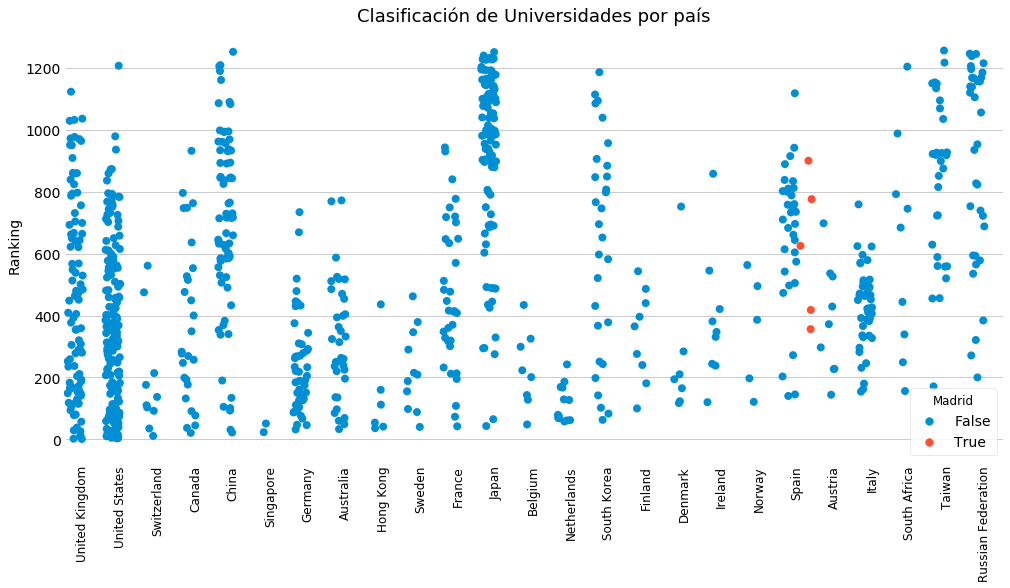

In [10]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
#sns.boxplot(x='pais',y='rank1', data=qs, linewidth=1,width = 0.3)
sns.stripplot(x='pais',y='rank1', hue = 'Madrid', data=qs2 ,size = 8, palette=sns.color_palette(),dodge = True, jitter = 0.4)
ax.set_xticklabels(paises, rotation = 90, va='top',fontsize= 12 )
ax.set_ylabel('Ranking')    
ax.set_xlabel('')
ax.set_title('Clasificación de Universidades por país',fontsize= 18)
plt.savefig('images/clasif_por_pais.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()

In [11]:
# Ranking de Madrid
qs2[qs2['Madrid']== True]


,rank1,rnk2,univ,pais,Madrid
355,356,351?400,Autonomous University of Madrid,Spain,True
417,418,401?500,Complutense University of Madrid,Spain,True
624,625,601?800,Carlos III University of Madrid,Spain,True
775,776,601?800,Technical University of Madrid,Spain,True
899,900,801?1000,King Juan Carlos University,Spain,True


In [12]:
# Ranking de España
qs2[qs2['pais']== 'Spain']


,rank1,rnk2,univ,pais,Madrid
139,140,135,Pompeu Fabra University,Spain,False
144,145,145,Autonomous University of Barcelona,Spain,False
202,203,201?250,University of Barcelona,Spain,False
271,272,251?300,University of Navarra,Spain,False
355,356,351?400,Autonomous University of Madrid,Spain,True
417,418,401?500,Complutense University of Madrid,Spain,True
472,473,401?500,University of Rovira i Virgili,Spain,False
496,497,401?500,University of Valencia,Spain,False
504,505,501?600,University of the Balearic Islands,Spain,False
541,542,501?600,University of La Laguna,Spain,False


In [13]:
# Nº de universidades de España
qs2[qs2['pais']== 'Spain']['rank1'].count()

38